# lib loading

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('dataset1.CSV', engine='python', encoding = 'utf-8')
data.head(50)


#data['EDEC_JBRDN_AMT'].value_counts().head(50)


data['EDEC_SBRDN_AMT'].value_counts().head(50)

data['AGE_GROUP'].value_counts()

1500     390468
3400     209617
4800     178482
4000      68449
4200      55182
6000      45072
2500      45052
1600      21859
1900       3765
1700       2658
0          2461
1800       2200
5100       1521
250        1140
1000       1084
4100        920
2900        755
17700       588
4900        560
5700        499
4700        461
16300       446
17300       428
3900        409
5900        403
17400       373
17500       321
16700       312
3700        294
17000       263
16100       249
5500        247
17200       245
18300       239
17600       238
7100        231
16500       230
17100       220
16200       218
7400        217
4300        215
6200        210
16400       208
17800       204
17900       204
18000       203
4400        196
3800        185
5200        182
18100       182
Name: EDEC_SBRDN_AMT, dtype: int64

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

# preprocessing

In [ ]:
import datetime

da=data[['SEX','AGE_GROUP','RECU_FR_DT','MAIN_SICK','SUB_SICK']]
da.info()
da['RECU_FR_DT']=pd.to_datetime(da['RECU_FR_DT'])
da['month']=da['RECU_FR_DT'].dt.month
da['month'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   SEX         1048575 non-null  int64 
 1   AGE_GROUP   1048575 non-null  int64 
 2   RECU_FR_DT  1048575 non-null  object
 3   MAIN_SICK   1048575 non-null  object
 4   SUB_SICK    1048575 non-null  object
dtypes: int64(2), object(3)
memory usage: 40.0+ MB


<ipython-input-3-60a7a36c3763>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da['RECU_FR_DT']=pd.to_datetime(da['RECU_FR_DT'])
<ipython-input-3-60a7a36c3763>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da['month']=da['RECU_FR_DT'].dt.month


1     118778
2      93548
11     90209
9      87731
7      86661
12     85702
6      85653
10     83083
3      81902
5      81620
8      78013
4      75675
Name: month, dtype: int64

In [ ]:
print(da['MAIN_SICK'].value_counts().head(50))
da['SUB_SICK'].value_counts().head(50)

MAIN=['E11.9','J30.4','K210','L239','K219','J02.9','J03.90','J06.0','J00','J30.3','K29.7']
SUB=[]


### MAIN SICK
#[E11.9] 합병증을 동반하지 않은 2형 당뇨병
#[J30.4] 상세불명의 앨러지비염
#K210 : 식도염을 동반한 위-식도역류
#L239 : 상세불명 원인의 앨러지성 접촉피부염
#K21.9 식도염을 동반하지 않은 위-식도역류병
#J02.9 상세불명의 급성 인두염
#J03.90 재발성으로 명시되어 있지 않은 상세불명의 급성 편도염
#J06.0 급성 후두인두염
#J00 급성 비인두염[감기]
#J30.3 기타 앨러지비염
#K29.7 상세불명의 위염
### SUB SICK
#[J20.9] 상세불명의 급성 기관지염
#E78.5] 상세불명의 고지질혈증
#K30] 기능성 소화불량
#[E78.0] 순수 고콜레스테롤혈증
#[I73.9] 상세불명의 말초혈관병
#[J03.90] 재발성으로 명시되어 있지 않은 상세불명의 급성 편도염

I109     141027
J209      87358
E119      26401
J304      22956
K210      22853
L239      19240
K219      17310
J029      15078
J0390     15008
N400      12333
J060      12138
B351      12101
J00       12081
J303      11814
N_        11011
K297      10470
F_        10104
M170       9527
M5456      8892
M4806      8807
J0190      8352
K291       8146
J040       7785
J40        7756
E785       7482
J069       7153
A099       7062
L238       7031
N185       6537
A090       6208
L500       5093
L249       4838
B353       4699
J042       4609
M511       4545
J_         4532
M179       4432
L209       4351
J329       4257
J0100      4099
K529       4084
E782       3894
J459       3771
E039       3577
J219       3555
M171       3520
S3350      3495
L309       3473
J320       3452
N300       3439
Name: MAIN_SICK, dtype: int64


## season

In [ ]:
def season(x) :
    if x>=3 and x<= 5 :
        return 1
    elif x>=6 and x<= 8 :
        return 2
    elif x>=9 and x<=11 :
        return 3
    else :
        return 4


In [ ]:
da['season']=da['month'].apply(season)

da['season'].value_counts()

<ipython-input-6-8bd727a4581b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da['season']=da['month'].apply(season)


4    298028
3    261023
2    250327
1    239197
Name: season, dtype: int64

## mainsick

In [ ]:
df=da[['SEX','AGE_GROUP','RECU_FR_DT','MAIN_SICK','SUB_SICK','month','season']]

df['main']=df['MAIN_SICK'].str.extract(r'(E119|J304|K210|L239|K219|J02.9|J0390|J06.0|J00|J303|K297)')



df=df.dropna()
#print(dai_drop.info())
df.shape
print(df['main'].value_counts())
df
#print(dai['sicki'].value_counts().head(20))
#print(dai['sicki'].head(50))
#dai_109=dai_drop[ ['SEX','AGE_GROUP','RECU_FR_DT','sicki','month','season']]

## I코드에서 I109를 제외한 count 상위 6개의 질병코드 추출
#dai=dai[dai['sicki'].str.contains('I739|I110|I119|I209|I639|I839')]

#dai['sicki'].value_counts()


E119     26401
J304     22956
K210     22853
L239     19240
K219     17310
J0390    15008
J00      12081
J303     11814
K297     10470
Name: main, dtype: int64


,SEX,AGE_GROUP,RECU_FR_DT,MAIN_SICK,SUB_SICK,month,season,main
7172,1,14,2020-10-05,J304,K297,10,3,J304
7184,1,14,2020-09-25,K219,K297,9,3,K219
7193,2,14,2020-09-28,K219,K297,9,3,K219
7194,2,14,2020-10-05,K219,K297,10,3,K219
7196,1,14,2020-01-09,K210,K297,1,4,K210
...,...,...,...,...,...,...,...,...
1048526,1,18,2020-02-08,K219,J040,2,4,K219
1048538,2,18,2020-01-21,J304,J040,1,4,J304
1048539,2,18,2020-11-20,J304,J040,11,3,J304
1048550,2,16,2020-03-24,L239,J040,3,1,L239


In [ ]:
df=df[['SEX','AGE_GROUP','main','SUB_SICK','season']]
df

,SEX,AGE_GROUP,main,SUB_SICK,season
7172,1,14,J304,K297,3
7184,1,14,K219,K297,3
7193,2,14,K219,K297,3
7194,2,14,K219,K297,3
7196,1,14,K210,K297,4
...,...,...,...,...,...
1048526,1,18,K219,J040,4
1048538,2,18,J304,J040,4
1048539,2,18,J304,J040,3
1048550,2,16,L239,J040,1


In [ ]:
ct=sns.countplot(x='season',hue='main', data=df)

![image.png](attachment:image.png)

In [ ]:
df['main']=df['main'].astype('category').cat.codes
df['SUB_SICK']=df['SUB_SICK'].astype('category').cat.codes

df['main'].value_counts()
df['SUB_SICK'].value_counts()

<ipython-input-9-9fb963102716>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main']=df['main'].astype('category').cat.codes
<ipython-input-9-9fb963102716>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUB_SICK']=df['SUB_SICK'].astype('category').cat.codes


478     15161
627     14201
366     12091
621      8192
630      6381
        ...  
1064        1
93          1
1116        1
988         1
1407        1
Name: SUB_SICK, Length: 1409, dtype: int64

# corr

In [ ]:
corr=df.corr(method = 'pearson')
corr



,SEX,AGE_GROUP,main,SUB_SICK,season
SEX,1.000000,0.048642,0.038512,0.021841,0.003907
AGE_GROUP,0.048642,1.000000,-0.077854,-0.021470,-0.039258
main,0.038512,-0.077854,1.000000,0.350639,-0.049676
SUB_SICK,0.021841,-0.021470,0.350639,1.000000,-0.010711
season,0.003907,-0.039258,-0.049676,-0.010711,1.000000


In [ ]:
fig=plt.figure(figsize = (10,10))
ax = fig.gca()

sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr.values, annot = True, fmt = '.2f', annot_kws={'size':15},
                     yticklabels = df, xticklabels = df, ax=ax, cmap='RdYlBu')

plt.tight_layout()
plt.show()

# 머리

In [ ]:
dh=da[['SEX','AGE_GROUP','MAIN_SICK','SUB_SICK','month','season']]


dh['head']=dh['MAIN_SICK'].str.extract(r'(R42|I63|I67|I61|I65|I69|S00)')
#dh['head']=dh['MAIN_SICK'].str.extract(r'(^A8[3-7]|B69|^C7[0-1]|D32|D33|D42|D43|^I6[0-9]|K72|P10|P12|P52|P91|^Q0[0-4]|^R4[0-2]|R47|R48|R03|^S0[0-9]|T20|T90)')
dh['head'].value_counts()

dh['head'].isnull().sum()

dh=dh.dropna()
dh['head'].value_counts()


R42    1957
I63    1816
I67     502
I61     426
I65     351
I69     314
S00     248
Name: head, dtype: int64

In [ ]:
dh['head']=dh['head'].astype('category').cat.codes
dh['SUB_SICK']=dh['SUB_SICK'].astype('category').cat.codes
corr=dh.corr(method = 'pearson')
corr

,SEX,AGE_GROUP,SUB_SICK,month,season,head
SEX,1.000000,-0.105262,0.055545,-0.012601,-0.004449,0.045801
AGE_GROUP,-0.105262,1.000000,-0.364129,-0.010223,0.008859,-0.098006
SUB_SICK,0.055545,-0.364129,1.000000,0.021311,0.017594,0.090550
month,-0.012601,-0.010223,0.021311,1.000000,0.224174,0.014839
season,-0.004449,0.008859,0.017594,0.224174,1.000000,0.008112
head,0.045801,-0.098006,0.090550,0.014839,0.008112,1.000000



## mind

In [ ]:
dm=da[['SEX','AGE_GROUP','MAIN_SICK','SUB_SICK','month','season']]


dm['mind']=dm['MAIN_SICK'].str.extract(r'(F*)')
dm['mind'].value_counts()


dm['mind']=dm['mind'].astype('category').cat.codes
dm['SUB_SICK']=dm['SUB_SICK'].astype('category').cat.codes
corr=dm.corr(method = 'pearson')
corr

,SEX,AGE_GROUP,SUB_SICK,month,season,mind
SEX,1.000000,0.064268,-0.005073,-0.001985,0.002226,0.021882
AGE_GROUP,0.064268,1.000000,0.002998,0.010832,-0.053508,0.065758
SUB_SICK,-0.005073,0.002998,1.000000,0.005744,-0.007190,-0.038932
month,-0.001985,0.010832,0.005744,1.000000,0.096820,0.007413
season,0.002226,-0.053508,-0.007190,0.096820,1.000000,-0.007831
mind,0.021882,0.065758,-0.038932,0.007413,-0.007831,1.000000


# face

In [ ]:
df=da[['SEX','AGE_GROUP','MAIN_SICK','SUB_SICK','month','season']]


df['face']=df['MAIN_SICK'].str.extract(r'(C41|R51|T20)')
df['face'].value_counts()

df['face']=df['face'].astype('category').cat.codes
df['SUB_SICK']=df['SUB_SICK'].astype('category').cat.codes
corr=df.corr(method = 'pearson')
corr

,SEX,AGE_GROUP,SUB_SICK,month,season,face
SEX,1.000000,0.064268,-0.005073,-0.001985,0.002226,0.009842
AGE_GROUP,0.064268,1.000000,0.002998,0.010832,-0.053508,-0.008502
SUB_SICK,-0.005073,0.002998,1.000000,0.005744,-0.007190,0.017814
month,-0.001985,0.010832,0.005744,1.000000,0.096820,0.005588
season,0.002226,-0.053508,-0.007190,0.096820,1.000000,-0.001851
face,0.009842,-0.008502,0.017814,0.005588,-0.001851,1.000000


# eye

In [ ]:
de=da[['SEX','AGE_GROUP','MAIN_SICK','SUB_SICK','month','season']]

de['eye']=de['MAIN_SICK'].str.extract(r'(H10+|H0411|H25+|H16+|H258|H010)')

#de['eye']=de['MAIN_SICK'].str.extract(r'(B30|C69|D31|H0[0-6]+|H10|H11|H1[3-9]+|H2[0-2]+|H2[5-8]+|H49|H5[0-5]+|H5[7-9]+|Q1[0-5]+|R52|S05|T15|T20|T26|W44|Y77)')
print(de['eye'].value_counts().head(10))

de['eye']=de['eye'].astype('category').cat.codes
de['SUB_SICK']=de['SUB_SICK'].astype('category').cat.codes
corr=de.corr(method = 'pearson')
corr

H10      4807
H25      2720
H0411    2692
H16      1892
H010      557
H100      207
H1000      35
Name: eye, dtype: int64


,SEX,AGE_GROUP,SUB_SICK,month,season,eye
SEX,1.000000,0.064268,-0.005073,-0.001985,0.002226,0.012720
AGE_GROUP,0.064268,1.000000,0.002998,0.010832,-0.053508,0.050098
SUB_SICK,-0.005073,0.002998,1.000000,0.005744,-0.007190,-0.066546
month,-0.001985,0.010832,0.005744,1.000000,0.096820,0.002301
season,0.002226,-0.053508,-0.007190,0.096820,1.000000,-0.009644
eye,0.012720,0.050098,-0.066546,0.002301,-0.009644,1.000000


# nose

In [ ]:
dn=da[['SEX','AGE_GROUP','MAIN_SICK','SUB_SICK','month','season']]

#dn['nose']=dn['MAIN_SICK'].str.extract(r'(C07+|C11+|C12+|C30+|C31+|C33+|D14+|H60+|H61+|H62+|H6[5-9]+|H7[0-5]+|H8[0-3]+|H9[0-5]+|J00|J01|J3[0-4]+)')
dn['nose']=dn['MAIN_SICK'].str.extract(r'(J304|J01|J00|J303)')

print(dn['nose'].value_counts().head(10))

dn['nose']=dn['nose'].astype('category').cat.codes
dn['SUB_SICK']=de['SUB_SICK'].astype('category').cat.codes
corr=dn.corr(method = 'pearson')
corr

J304    22956
J01     16941
J00     12081
J303    11814
Name: nose, dtype: int64


,SEX,AGE_GROUP,SUB_SICK,month,season,nose
SEX,1.000000,0.064268,-0.005073,-0.001985,0.002226,-0.021824
AGE_GROUP,0.064268,1.000000,0.002998,0.010832,-0.053508,-0.200186
SUB_SICK,-0.005073,0.002998,1.000000,0.005744,-0.007190,-0.028108
month,-0.001985,0.010832,0.005744,1.000000,0.096820,-0.005462
season,0.002226,-0.053508,-0.007190,0.096820,1.000000,0.029192
nose,-0.021824,-0.200186,-0.028108,-0.005462,0.029192,1.000000


# teeth

In [ ]:
dt=da[['SEX','AGE_GROUP','MAIN_SICK','SUB_SICK','month','season']]

#dt['teeth']=dt['MAIN_SICK'].str.extract(r'(K0[0-8]+|R52+|W94+)')
dt['teeth']=dt['MAIN_SICK'].str.extract(r'(R52|K052|K050)')
print(dt['teeth'].value_counts().head(10))

dt['teeth']=dt['teeth'].astype('category').cat.codes
dt['SUB_SICK']=dt['SUB_SICK'].astype('category').cat.codes
corr=dt.corr(method = 'pearson')
corr

R52     446
K052    214
K050    157
Name: teeth, dtype: int64


,SEX,AGE_GROUP,SUB_SICK,month,season,teeth
SEX,1.000000,0.064268,-0.005073,-0.001985,0.002226,0.003116
AGE_GROUP,0.064268,1.000000,0.002998,0.010832,-0.053508,0.003403
SUB_SICK,-0.005073,0.002998,1.000000,0.005744,-0.007190,0.005722
month,-0.001985,0.010832,0.005744,1.000000,0.096820,-0.000901
season,0.002226,-0.053508,-0.007190,0.096820,1.000000,0.002692
teeth,0.003116,0.003403,0.005722,-0.000901,0.002692,1.000000


# oral

In [ ]:
do=da[['SEX','AGE_GROUP','MAIN_SICK','SUB_SICK','month','season']]

do['oral']=do['MAIN_SICK'].str.extract(r'(C0[0-9]+|C10+|C14+|D00+|D10+|K09+|K1[0-4]+|Q3[5-7]+|R52+|R85+|T20+)')
do['oral']=do['MAIN_SICK'].str.extract(r'(R52|K052|K050)')
print(do['oral'].value_counts().head(10))

do['oral']=do['oral'].astype('category').cat.codes
do['SUB_SICK']=do['SUB_SICK'].astype('category').cat.codes
corr=do.corr(method = 'pearson')
corr

R52     446
K052    214
K050    157
Name: oral, dtype: int64


,SEX,AGE_GROUP,SUB_SICK,month,season,oral
SEX,1.000000,0.064268,-0.005073,-0.001985,0.002226,0.003116
AGE_GROUP,0.064268,1.000000,0.002998,0.010832,-0.053508,0.003403
SUB_SICK,-0.005073,0.002998,1.000000,0.005744,-0.007190,0.005722
month,-0.001985,0.010832,0.005744,1.000000,0.096820,-0.000901
season,0.002226,-0.053508,-0.007190,0.096820,1.000000,0.002692
oral,0.003116,0.003403,0.005722,-0.000901,0.002692,1.000000


# total

In [ ]:
dm=da[['SEX','AGE_GROUP','MAIN_SICK','SUB_SICK','month','season']]

#dm['main']=do['MAIN_SICK'].str.extract(r'(R42+|I63+|I67+|I61+|I65+|I69+|S00+|C41|R51|T20|H10+|H0411|H25+|H16+|H258|H010|J304|J01|J00|J303|R52|K052|K050|R52|K052|K050)')
dm['main']=do['MAIN_SICK'].str.extract(r'(J304|J01|J00|J303|H10+|H25+|H041+|R51+|R42+H16+)')
print(dm['main'].value_counts().head(30))

dm['main']=dm['main'].astype('category').cat.codes
dm=dm[dm.main != -1]
dm['SUB_SICK']=dm['SUB_SICK'].astype('category').cat.codes
corr=dm.corr(method = 'pearson')
corr



J304     22956
J01      16941
J00      12081
J303     11814
H10       4807
H25       2720
H0411     2692
R51       2066
H100       207
H041       138
H1000       35
Name: main, dtype: int64


,SEX,AGE_GROUP,SUB_SICK,month,season,main
SEX,1.000000,0.123852,-0.010934,-0.016712,0.011868,-0.065185
AGE_GROUP,0.123852,1.000000,-0.080767,-0.071931,-0.027797,-0.286270
SUB_SICK,-0.010934,-0.080767,1.000000,-0.022517,0.033857,0.355053
month,-0.016712,-0.071931,-0.022517,1.000000,0.008350,0.010238
season,0.011868,-0.027797,0.033857,0.008350,1.000000,0.043811
main,-0.065185,-0.286270,0.355053,0.010238,0.043811,1.000000


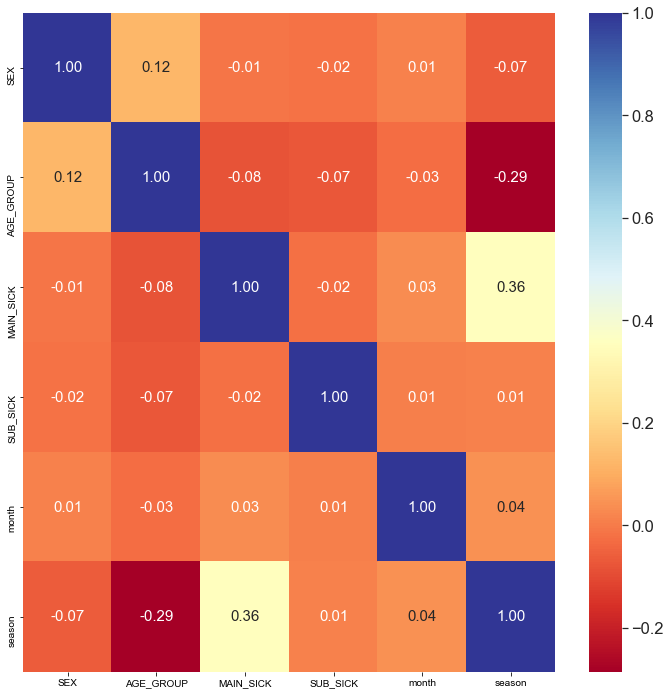

In [ ]:
cols=['SEX','AGE_GROUP','MAIN_SICK','SUB_SICK','month','season']

fig = plt.figure(figsize= (10,10))
ax = fig.gca()

sns.set(font_scale = 1.5)
heatmap = sns.heatmap(corr.values, annot = True, fmt = '.2f', annot_kws={'size':15},
                     yticklabels = cols, xticklabels = cols, ax=ax, cmap='RdYlBu')


plt.tight_layout()
plt.show()

# k-means for total

         SEX  AGE_GROUP  season  main  SUB_SICK
7172       1         14       3     9       569
7491       2         14       3     6       569
7981       2         14       3     6       569
8152       1         14       3     6       569
8194       2         15       4    10       569
...      ...        ...     ...   ...       ...
1048515    2         15       4     6       437
1048525    1         18       4     9       437
1048538    2         18       4     9       437
1048539    2         18       3     9       437
1048562    1         14       3     9       430

[76457 rows x 5 columns]
k:  1 | cost :  1979892807.2354429
k:  2 | cost :  925187541.2432132
k:  3 | cost :  282061926.2301768
k:  4 | cost :  133924679.69619392
k:  5 | cost :  101418132.35968514
k:  6 | cost :  73929074.00857335
k:  7 | cost :  50946525.47937208
k:  8 | cost :  41119125.41008108
k:  9 | cost :  31830927.112655506
k:  10 | cost :  26231674.379346944
k:  11 | cost :  20719096.28388585
k:  12 | cost :  

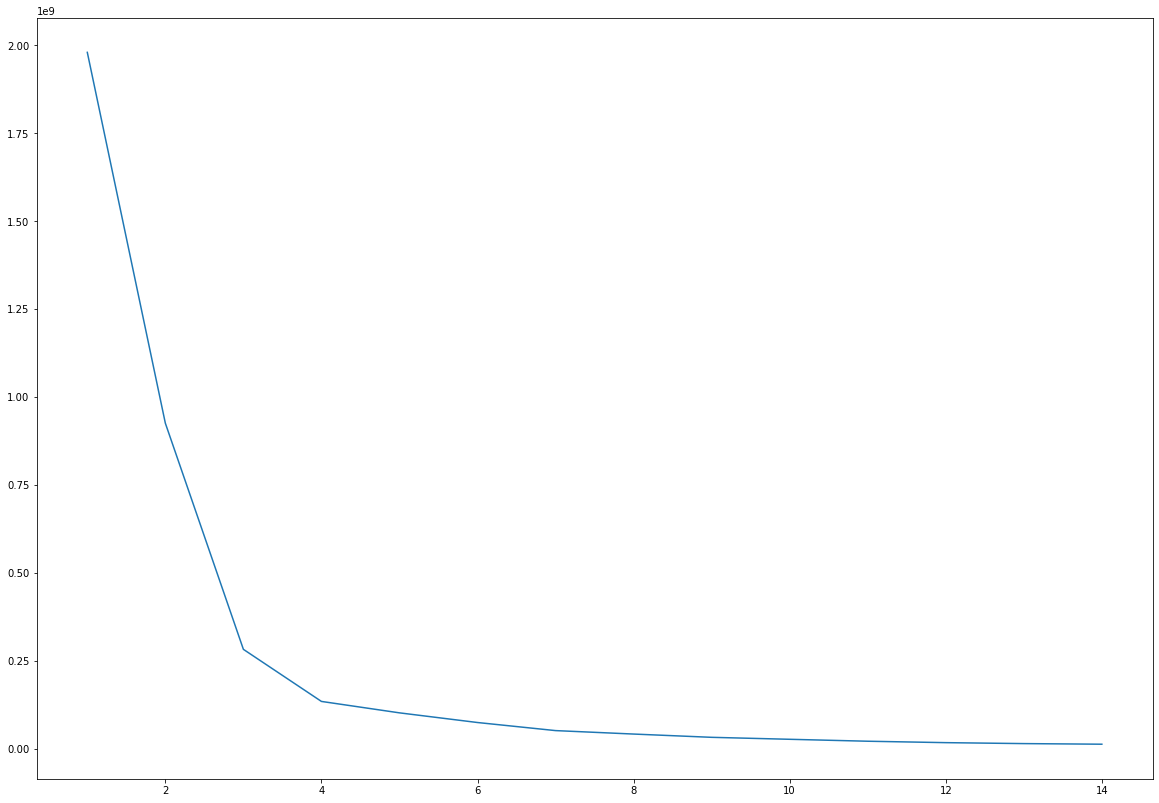

In [ ]:
dm=dm[ ['SEX','AGE_GROUP','season','main','SUB_SICK']]
dm

print(dm)

from sklearn.cluster import KMeans

x= dm

k_list=[]
cost_list=[]

for k in range(1,15) :
    kmeans = KMeans(n_clusters=k).fit(x)
    interia = kmeans.inertia_
    print('k: ', k, "| cost : ", interia)
    k_list.append(k)
    cost_list.append(interia)

plt.figure(figsize=(20,14))
plt.plot(k_list, cost_list)

In [ ]:
kmeans=KMeans(n_clusters=5).fit(X)
cluster_num=pd.Series(kmeans.predict(X))
dm['cluster_num']=cluster_num.values
dm

,SEX,AGE_GROUP,season,main,SUB_SICK,cluster_num
7172,1,14,3,9,569,0
7491,2,14,3,6,569,0
7981,2,14,3,6,569,0
8152,1,14,3,6,569,0
8194,2,15,4,10,569,0
...,...,...,...,...,...,...
1048515,2,15,4,6,437,1
1048525,1,18,4,9,437,1
1048538,2,18,4,9,437,1
1048539,2,18,3,9,437,1


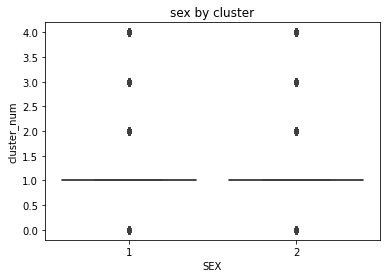

In [ ]:
sns.boxplot(x='SEX', y='cluster_num', data=dm)
plt.title('sex by cluster')
plt.show()

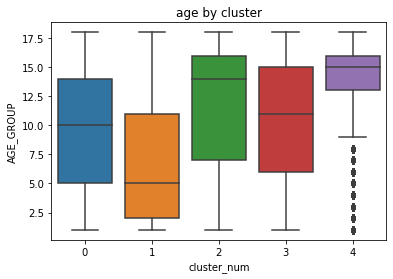

In [ ]:
sns.boxplot(x='cluster_num', y='AGE_GROUP', data=dm)
plt.title('age by cluster')
plt.show()

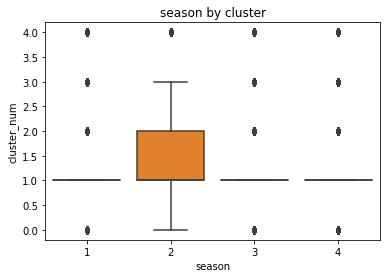

In [ ]:
sns.boxplot(x='season', y='cluster_num', data=dm)
plt.title('season by cluster')
plt.show()

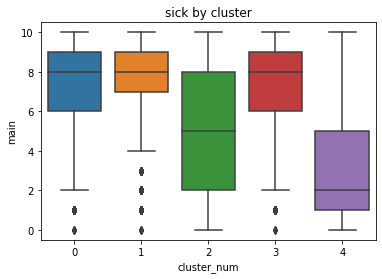

In [ ]:
sns.boxplot(x='cluster_num', y='main', data=dm)
plt.title('sick by cluster')
plt.show()

No handles with labels found to put in legend.


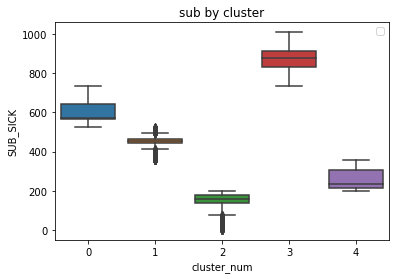

In [ ]:
sns.boxplot(x='cluster_num', y='SUB_SICK', data=dm)
plt.title('sub by cluster')
plt.legend()
plt.show()